In [69]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, mood
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

matplotlib.style.use('ggplot')

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

# Part 1: Modeling Challenge
---
* Load in the data file and header file provided. 
    * The dataframe does not currently have a header, load in the header file and attach it to the dataframe

In [3]:
# Read in column names from txt file
fieldnames_path = 'data/field_names.txt'
with open(fieldnames_path, 'r') as f:
    # Returns a list with a \n (newline) character in each element
    col_names = f.readlines()
# Remove the newline character from each element of the list
col_names = list(map(lambda s: s.strip(), col_names))
col_names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [4]:
# Read in the data from the csv_file
data_path = "data/breast-cancer.csv"
# Set fieldnames to be the list of column names read in. Set ID variable as index.
df = pd.read_csv(data_path, names=col_names).set_index('ID')
df.head()

diagnosis  radius_mean  radius_sd_error  radius_worst  texture_mean  texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  perimeter_worst  area_mean  area_sd_error  area_worst  smoothness_mean  smoothness_sd_error  smoothness_worst  compactness_mean  compactness_sd_error  compactness_worst  concavity_mean  concavity_sd_error  concavity_worst  concave_points_mean  concave_points_sd_error  concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  fractal_dimension_sd_error  fractal_dimension_worst
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
842302    M         17.99        10.38            122.80        1001.0        0.11840           0.27760        0.3001          0.14710             0.2419           0.07871    1.0950         0.9053      8.589            153.40               0.006399          0.04904           0.05373               0.01587            0.03003         0.006193            25.38            17.33                184.60                   2019.0                0.1622         0.6656             0.7119          0.2654                  0.4601                      0.11890                
842517    M         20.57        17.77            132.90        1326.0        0.08474           0.07864        0.0869          0.07017             0.1812           0.05667    0.5435         0.7339      3.398            74.08                0.005225          0.01308           0.01860               0.01340            0.01389         0.003532            24.99            23.41                158.80                   1956.0                0.1238         0.1866             0.2416          0.1860                  0.2750                      0.08902                
84300903  M         19.69        21.25            130.00        1203.0        0.10960           0.15990        0.1974          0.12790             0.2069           0.05999    0.7456         0.7869      4.585            94.03                0.006150          0.04006           0.03832               0.02058            0.02250         0.004571            23.57            25.53                152.50                   1709.0                0.1444         0.4245             0.4504          0.2430                  0.3613                      0.08758                
84348301  M         11.42        20.38            77.58         386.1         0.14250           0.28390        0.2414          0.10520             0.2597           0.09744    0.4956         1.1560      3.445            27.23                0.009110          0.07458           0.05661               0.01867            0.05963         0.009208            14.91            26.50                98.87                    567.7                 0.2098         0.8663             0.6869          0.2575                  0.6638                      0.17300                
84358402  M         20.29        14.34            135.10        1297.0        0.10030           0.13280        0.1980          0.10430             0.1809           0.05883    0.7572         0.7813      5.438            94.44                0.011490          0.02461           0.05688               0.01885            0.01756         0.005115            22.54            16.67                152.20                   1575.0                0.1374         0.2050             0.4000          0.1625                  0.2364                      0.07678

* Comment on any steps you might take to evaluate or transform the dataset.
---
1. Check for missing values
1. Run Exploratory Data Analysis to look at variable distributions
1. Remove outliers if any
1. Use One Hot Encoding for Categorical Variable (Diagnosis)
1. Standardize Features by Normalizing (Z-Scoring)

In [5]:
# No missing values found in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              569 non-null float64
compactness_sd_error  

In [6]:
# Check datatypes
print(df.dtypes)

diagnosis                     object 
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mean                 float64
symmetry_sd_

B    357
M    212
Name: diagnosis, dtype: int64


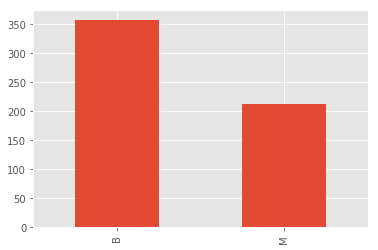

In [7]:
# What values of Diagnosis are available?
df.diagnosis.value_counts().plot(kind='bar')
print(df.diagnosis.value_counts())
plt.show()

Note there are an unqual number of benign and malignant tumors. For classification this leads to an imbalanced classification problem.

In [8]:
# Statistical summary shows different orders of magnitude for fields
df.describe()

radius_mean  radius_sd_error  radius_worst  texture_mean  texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  perimeter_worst   area_mean  area_sd_error  area_worst  smoothness_mean  smoothness_sd_error  smoothness_worst  compactness_mean  compactness_sd_error  compactness_worst  concavity_mean  concavity_sd_error  concavity_worst  concave_points_mean  concave_points_sd_error  concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  fractal_dimension_sd_error  fractal_dimension_worst
count  569.000000   569.000000       569.000000    569.000000    569.000000        569.000000     569.000000      569.000000          569.000000       569.000000  569.000000     569.000000  569.000000       569.000000           569.000000        569.000000        569.000000            569.000000         569.000000      569.000000          569.000000       569.000000           569.000000               569.000000            569.000000     569.000000         569.000000      569.000000              569.000000                  569.000000             
mean   14.127292    19.289649        91.969033     654.889104    0.096360          0.104341       0.088799        0.048919            0.181162         0.062798    0.405172       1.216853    2.866059         40.337079            0.007041          0.025478          0.031894              0.011796           0.020542        0.003795            16.269190        25.677223            107.261213               880.583128            0.132369       0.254265           0.272188        0.114606                0.290076                    0.083946               
std    3.524049     4.301036         24.298981     351.914129    0.014064          0.052813       0.079720        0.038803            0.027414         0.007060    0.277313       0.551648    2.021855         45.491006            0.003003          0.017908          0.030186              0.006170           0.008266        0.002646            4.833242         6.146258             33.602542                569.356993            0.022832       0.157336           0.208624        0.065732                0.061867                    0.018061               
min    6.981000     9.710000         43.790000     143.500000    0.052630          0.019380       0.000000        0.000000            0.106000         0.049960    0.111500       0.360200    0.757000         6.802000             0.001713          0.002252          0.000000              0.000000           0.007882        0.000895            7.930000         12.020000            50.410000                185.200000            0.071170       0.027290           0.000000        0.000000                0.156500                    0.055040               
25%    11.700000    16.170000        75.170000     420.300000    0.086370          0.064920       0.029560        0.020310            0.161900         0.057700    0.232400       0.833900    1.606000         17.850000            0.005169          0.013080          0.015090              0.007638           0.015160        0.002248            13.010000        21.080000            84.110000                515.300000            0.116600       0.147200           0.114500        0.064930                0.250400                    0.071460               
50%    13.370000    18.840000        86.240000     551.100000    0.095870          0.092630       0.061540        0.033500            0.179200         0.061540    0.324200       1.108000    2.287000         24.530000            0.006380          0.020450          0.025890              0.010930           0.018730        0.003187            14.970000        25.410000            97.660000                686.500000            0.131300       0.211900           0.226700        0.099930                0.282200                    0.080040               
75%    15.780000    21.800000        104.100000    782.700000    0.105300          0.130400       0.130700        0.074000            0.195700 

Note that different features have different orders of magnitude. Without standardizing features we run the risk of features with larger orders of magnitude dominating the features of smaller magnitude.

In [9]:
# Look at the correlations between the different variables
df.corr()

radius_mean  radius_sd_error  radius_worst  texture_mean  texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  perimeter_worst  area_mean  area_sd_error  area_worst  smoothness_mean  smoothness_sd_error  smoothness_worst  compactness_mean  compactness_sd_error  compactness_worst  concavity_mean  concavity_sd_error  concavity_worst  concave_points_mean  concave_points_sd_error  concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  fractal_dimension_sd_error  fractal_dimension_worst
radius_mean                 1.000000     0.323782         0.997855      0.987357      0.170581          0.506124       0.676764        0.822529            0.147741        -0.311631   0.679090      -0.097317    0.674172         0.735864            -0.222600          0.206000          0.194204              0.376169          -0.104321       -0.042641            0.969539         0.297008             0.965137                 0.941082              0.119616       0.413463           0.526911        0.744214                0.163953                    0.007066               
radius_sd_error             0.323782     1.000000         0.329533      0.321086     -0.023389          0.236702       0.302418        0.293464            0.071401        -0.076437   0.275869       0.386358    0.281673         0.259845             0.006614          0.191975          0.143293              0.163851           0.009127        0.054458            0.352573         0.912045             0.358040                 0.343546              0.077503       0.277830           0.301025        0.295316                0.105008                    0.119205               
radius_worst                0.997855     0.329533         1.000000      0.986507      0.207278          0.556936       0.716136        0.850977            0.183027        -0.261477   0.691765      -0.086761    0.693135         0.744983            -0.202694          0.250744          0.228082              0.407217          -0.081629       -0.005523            0.969476         0.303038             0.970387                 0.941550              0.150549       0.455774           0.563879        0.771241                0.189115                    0.051019               
texture_mean                0.987357     0.321086         0.986507      1.000000      0.177028          0.498502       0.685983        0.823269            0.151293        -0.283110   0.732562      -0.066280    0.726628         0.800086            -0.166777          0.212583          0.207660              0.372320          -0.072497       -0.019887            0.962746         0.287489             0.959120                 0.959213              0.123523       0.390410           0.512606        0.722017                0.143570                    0.003738               
texture_sd_error            0.170581    -0.023389         0.207278      0.177028      1.000000          0.659123       0.521984        0.553695            0.557775         0.584792   0.301467       0.068406    0.296092         0.246552             0.332375          0.318943          0.248396              0.380676           0.200774        0.283607            0.213120         0.036072             0.238853                 0.206718              0.805324       0.472468           0.434926        0.503053                0.394309                    0.499316               
texture_worst               0.506124     0.236702         0.556936      0.498502      0.659123          1.000000       0.883121        0.831135            0.602641         0.565369   0.497473       0.046205    0.548905         0.455653             0.135299          0.738722          0.570517              0.642262           0.229977        0.507318            0.535315         0.248133             0.590210                 0.509604              0.565541       0.865809           0.816275        0.815573                0.510223                    0.687382               
perimeter_mean          

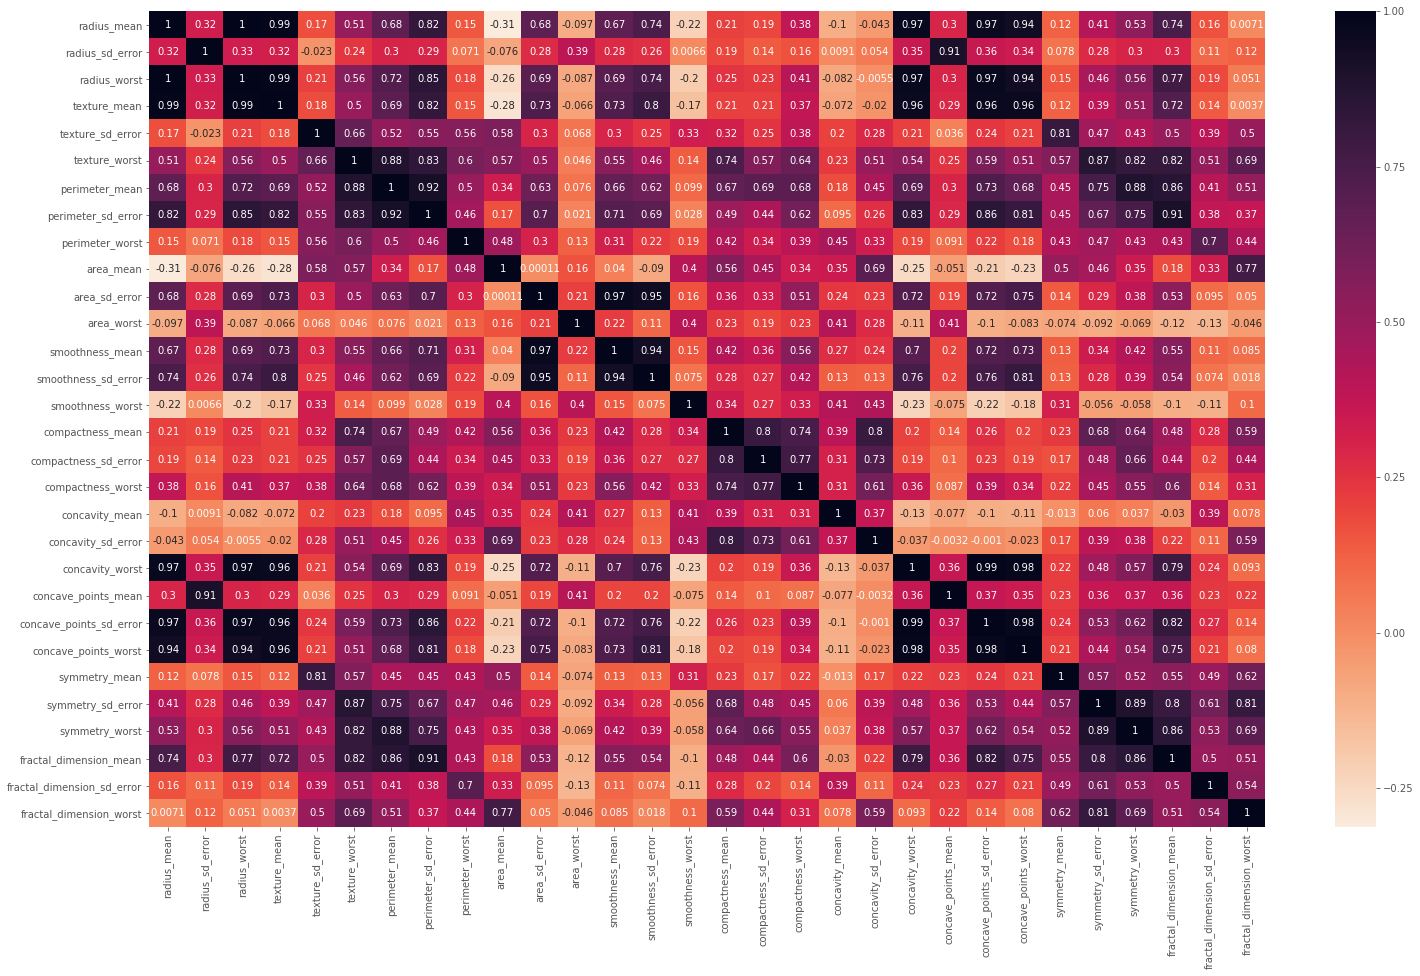

In [10]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(), annot=True, cmap = sns.cm.rocket_r, ax=ax)
plt.show()

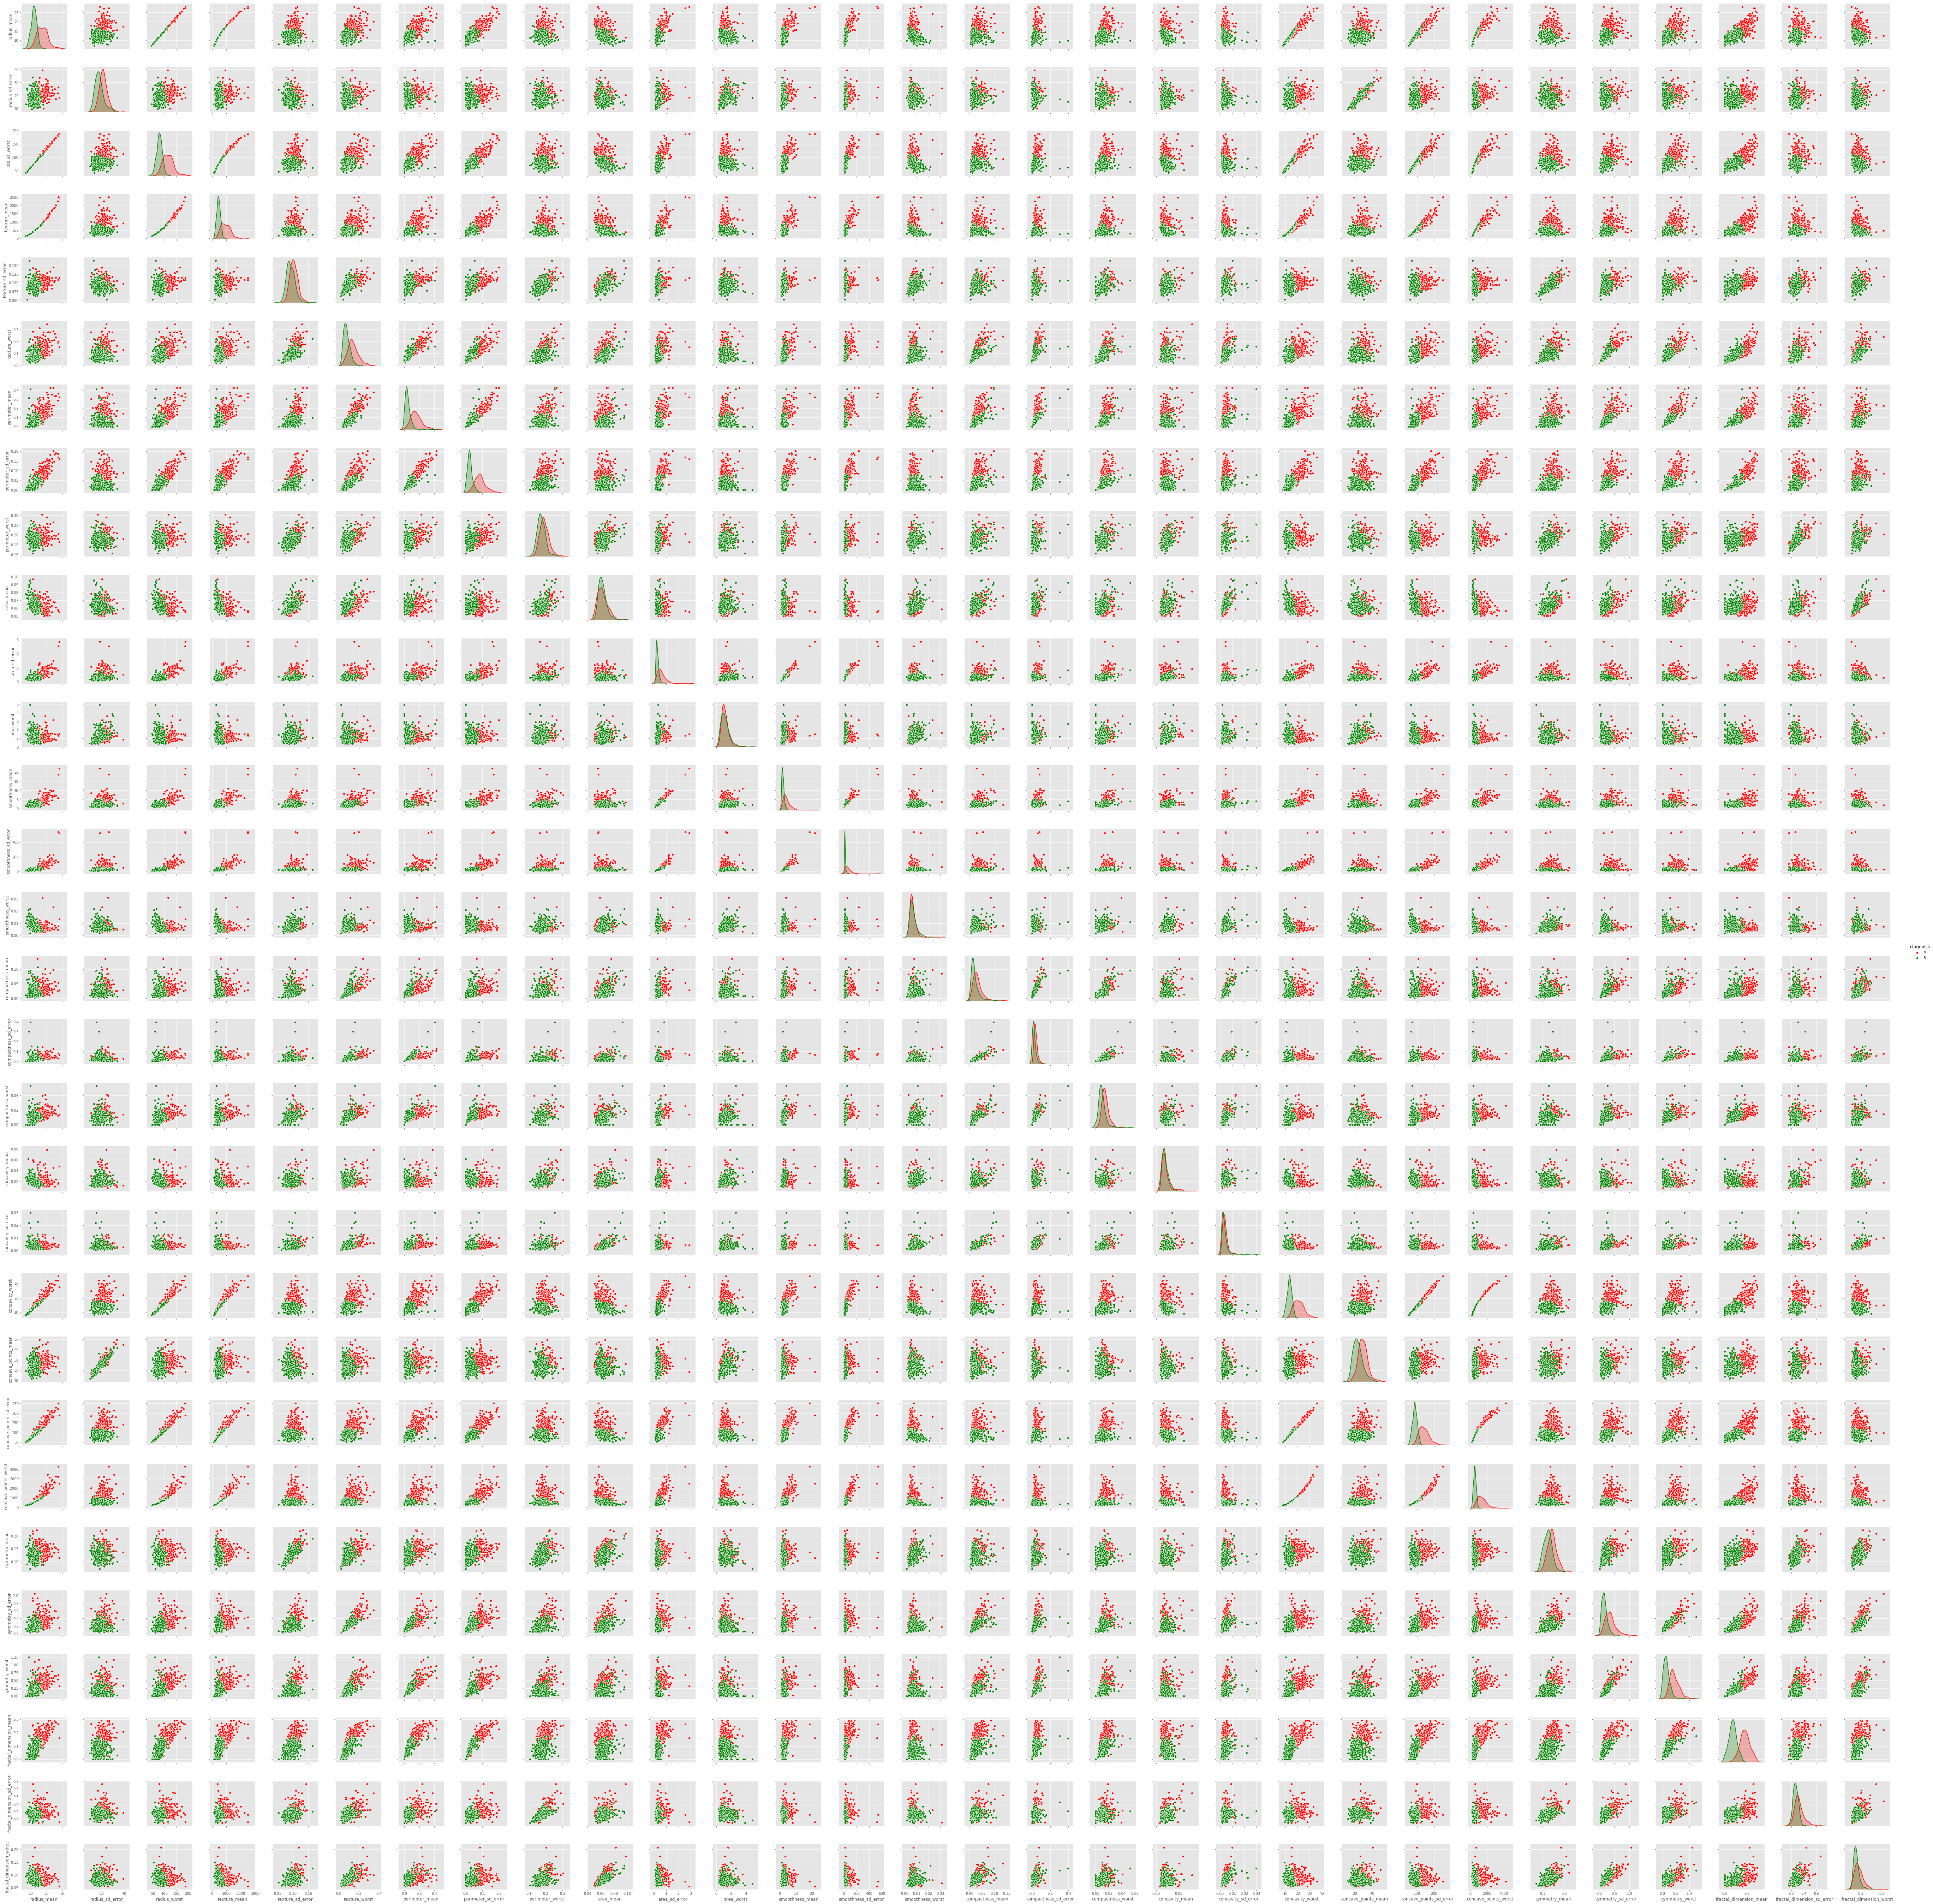

In [11]:
# Visualise the distribution of the dataset
sns.pairplot(df, hue='diagnosis', palette=('r','g'))
plt.show()

<Figure size 576x576 with 0 Axes>

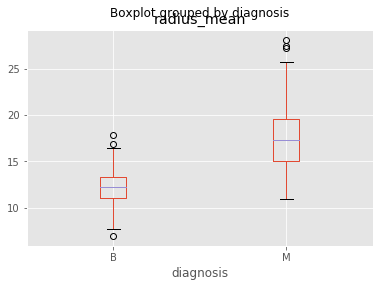

<Figure size 576x576 with 0 Axes>

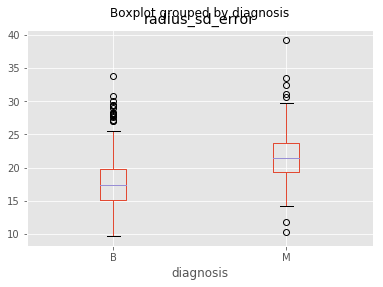

<Figure size 576x576 with 0 Axes>

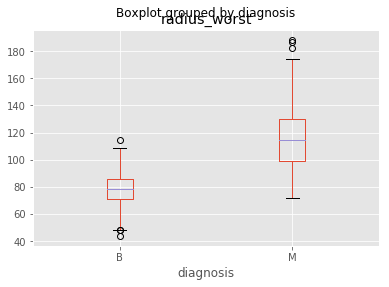

<Figure size 576x576 with 0 Axes>

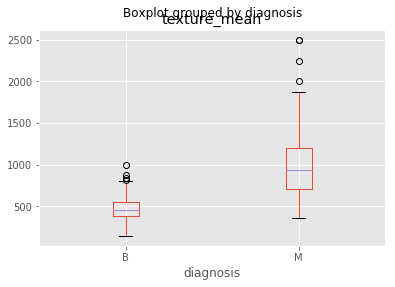

<Figure size 576x576 with 0 Axes>

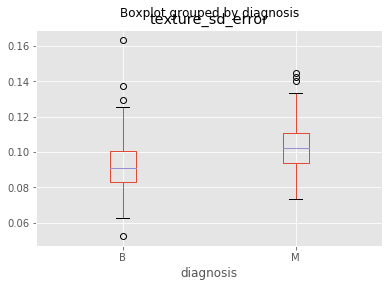

<Figure size 576x576 with 0 Axes>

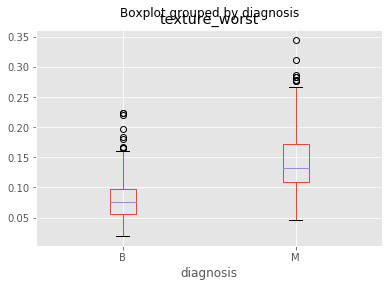

<Figure size 576x576 with 0 Axes>

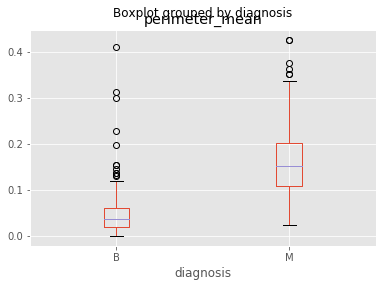

<Figure size 576x576 with 0 Axes>

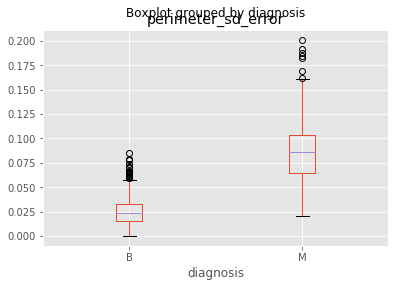

<Figure size 576x576 with 0 Axes>

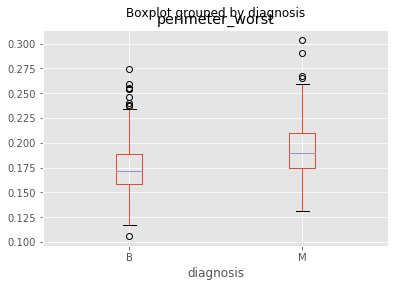

<Figure size 576x576 with 0 Axes>

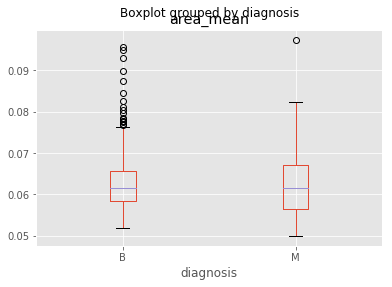

<Figure size 576x576 with 0 Axes>

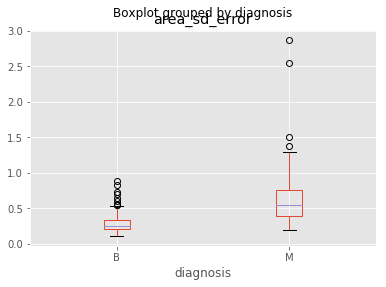

<Figure size 576x576 with 0 Axes>

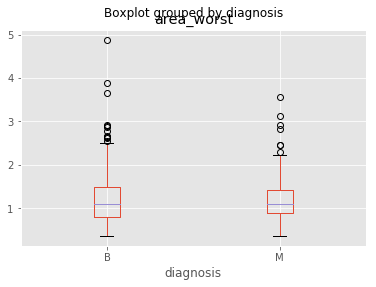

<Figure size 576x576 with 0 Axes>

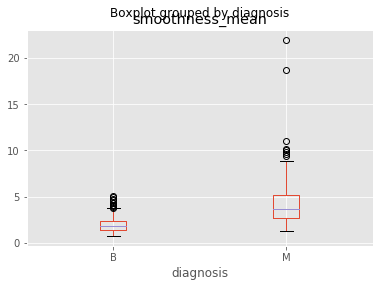

<Figure size 576x576 with 0 Axes>

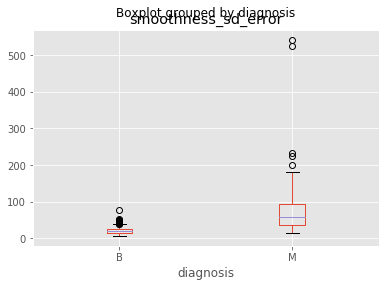

<Figure size 576x576 with 0 Axes>

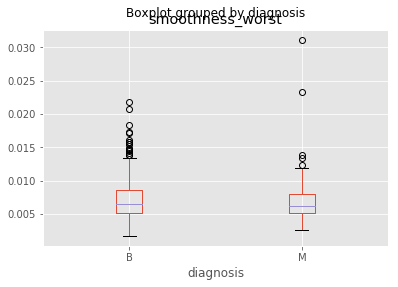

<Figure size 576x576 with 0 Axes>

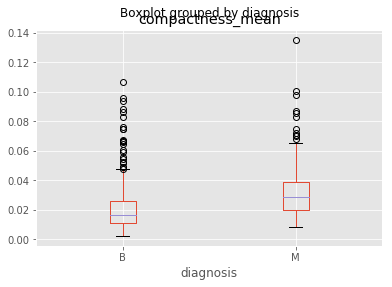

<Figure size 576x576 with 0 Axes>

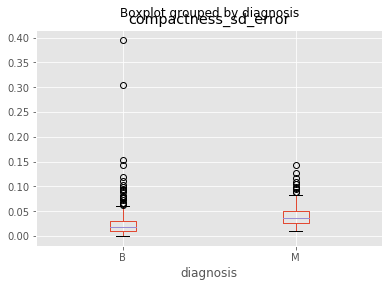

<Figure size 576x576 with 0 Axes>

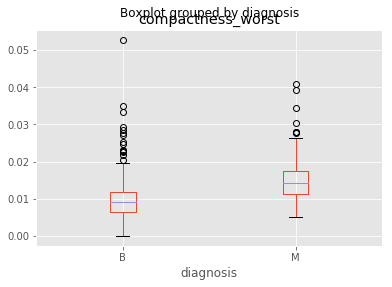

<Figure size 576x576 with 0 Axes>

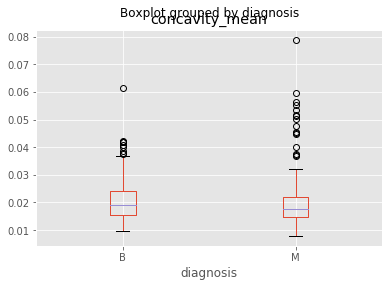

<Figure size 576x576 with 0 Axes>

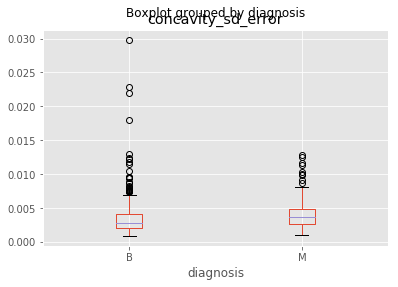

<Figure size 576x576 with 0 Axes>

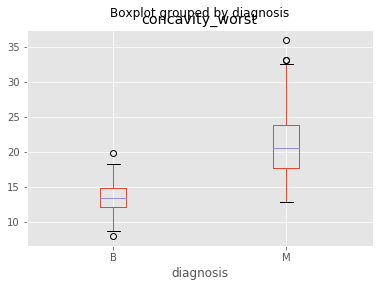

<Figure size 576x576 with 0 Axes>

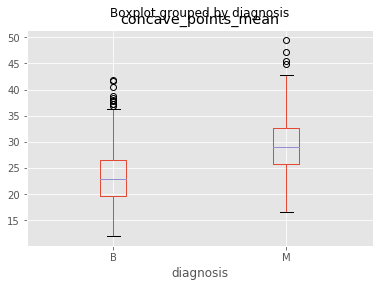

<Figure size 576x576 with 0 Axes>

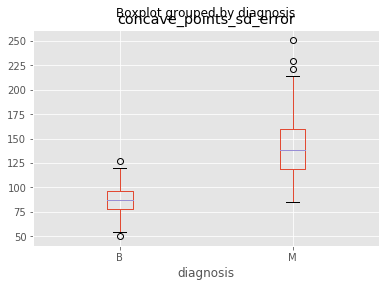

<Figure size 576x576 with 0 Axes>

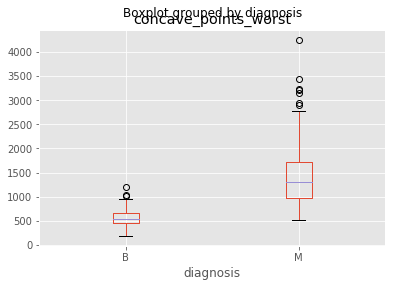

<Figure size 576x576 with 0 Axes>

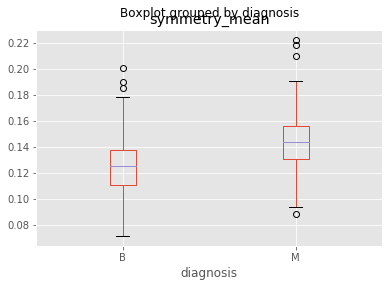

<Figure size 576x576 with 0 Axes>

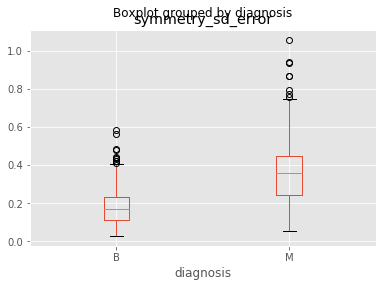

<Figure size 576x576 with 0 Axes>

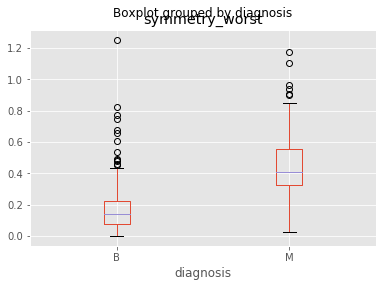

<Figure size 576x576 with 0 Axes>

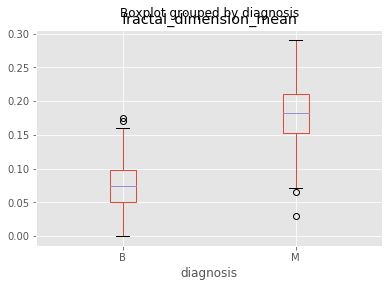

<Figure size 576x576 with 0 Axes>

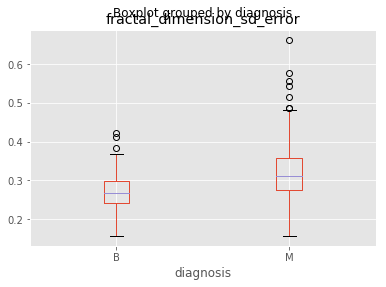

<Figure size 576x576 with 0 Axes>

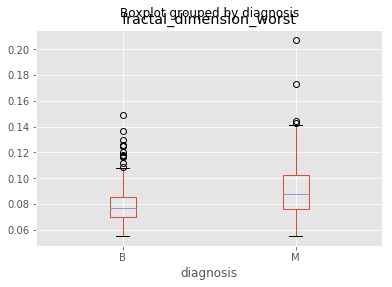

In [12]:
for i in df.drop('diagnosis', axis=1).columns:
    plt.figure(figsize=(8,8))
    plt.suptitle('')
    df.boxplot(column=[i], by='diagnosis')
    plt.show()

In [13]:
# Standardize variables to accomodate for different orders of magnitude
X = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
scaled_df.head()

radius_mean  radius_sd_error  radius_worst  texture_mean  texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  perimeter_worst  area_mean  area_sd_error  area_worst  smoothness_mean  smoothness_sd_error  smoothness_worst  compactness_mean  compactness_sd_error  compactness_worst  concavity_mean  concavity_sd_error  concavity_worst  concave_points_mean  concave_points_sd_error  concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  fractal_dimension_sd_error  fractal_dimension_worst
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
842302    1.097064    -2.073335         1.269934      0.984375      1.568466          3.283515       2.652874        2.532475            2.217515         2.255747   2.489734      -0.565265    2.833031         2.487578            -0.214002          1.316862          0.724026              0.660820           1.148757        0.907083            1.886690        -1.359293             2.303601                 2.001237              1.307686       2.616665           2.109526        2.296076                2.750622                    1.937015               
842517    1.829821    -0.353632         1.685955      1.908708     -0.826962         -0.487072      -0.023846        0.548144            0.001392        -0.868652   0.499255      -0.876244    0.263327         0.742402            -0.605351         -0.692926         -0.440780              0.260162          -0.805450       -0.099444            1.805927        -0.369203             1.535126                 1.890489             -0.375612      -0.430444          -0.146749        1.087084               -0.243890                    0.281190               
84300903  1.579888     0.456187         1.566503      1.558884      0.942210          1.052926       1.363478        2.037231            0.939685        -0.398008   1.228676      -0.780083    0.850928         1.181336            -0.297005          0.814974          0.213076              1.424827           0.237036        0.293559            1.511870        -0.023974             1.347475                 1.456285              0.527407       1.082932           0.854974        1.955000                1.152255                    0.201391               
84348301 -0.768909     0.253732        -0.592687     -0.764464      3.283553          3.402909       1.915897        1.451707            2.867383         4.910919   0.326373      -0.110409    0.286593        -0.288378             0.689702          2.744280          0.819518              1.115007           4.732680        2.047511           -0.281464         0.133984            -0.249939                -0.550021              3.394275       3.893397           1.989588        2.175786                6.046041                    4.935010               
84358402  1.750297    -1.151816         1.776573      1.826229      0.280372          0.539340       1.371011        1.428493           -0.009560        -0.562450   1.270543      -0.790244    1.273189         1.190357             1.483067         -0.048520          0.828471              1.144205          -0.361092        0.499328            1.298575        -1.466770             1.338539                 1.220724              0.220556      -0.313395           0.613179        0.729259               -0.868353                   -0.397100

* Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? 
    * Explain how you would identify this.

In [14]:
print("There are", df.loc[df.diagnosis == 'B']['smoothness_mean'].count(), "benign tumors.")
print("There are", df.loc[df.diagnosis == 'M']['smoothness_mean'].count(), "malignant tumors.")
print("The mean smoothness of benign tumors is", df.loc[df.diagnosis == 'B']['smoothness_mean'].mean())
print("The median smoothness of benign tumors is", df.loc[df.diagnosis == 'B']['smoothness_mean'].median())
print("The mean smoothness of malignant tumors is", df.loc[df.diagnosis == 'M']['smoothness_mean'].mean())
print("The median smoothness of malignant tumors is", df.loc[df.diagnosis == 'M']['smoothness_mean'].median())

There are 357 benign tumors.
There are 212 malignant tumors.
The mean smoothness of benign tumors is 2.0003212885154062
The median smoothness of benign tumors is 1.851
The mean smoothness of malignant tumors is 4.3239292452830185
The median smoothness of malignant tumors is 3.6795


While the sample of malignant tumors is smaller than the sample of benign tumors, the mean and median of malignant tumors appears to be larger than the mean and median of benign tumors. This is also confirmed visually when looking at the mean and median of the distributions of these two samples.

Note that in the malignant breast cells there are also potential outliers in the data.

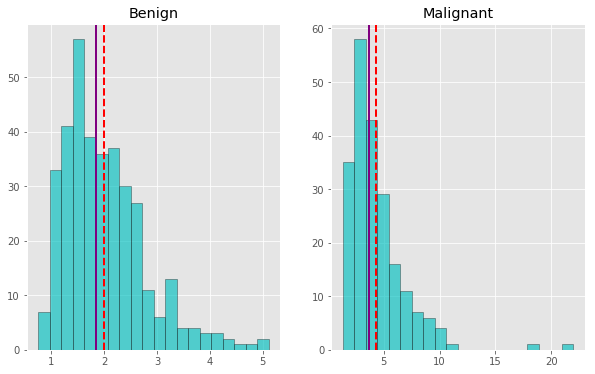

In [15]:
# Look for visual confirmation via distributions of mean and median.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
benign = df.loc[df.diagnosis == 'B']['smoothness_mean']
malignant = df.loc[df.diagnosis == 'M']['smoothness_mean']
result = ax1.hist(benign, bins=20, color='c', edgecolor='k', alpha=0.65)
ax1.axvline(benign.mean(), color='red', linestyle='dashed', linewidth=2)
ax1.axvline(benign.median(), color='purple', linewidth=2)
ax1.set_title('Benign')
result = ax2.hist(malignant, bins=20, color='c', edgecolor='k', alpha=0.65)
ax2.axvline(malignant.mean(), color='red', linestyle='dashed', linewidth=2)
ax2.axvline(malignant.median(), color='purple', linewidth=2)
ax2.set_title('Malignant')
plt.show()

Testing the difference of means between the benign and malignant samples using a two-sample t-test shows the means are statistically different with a 1% level of significance.

In [16]:
t_stat, p_val = ttest_ind(benign, malignant, equal_var=False)
print("The t-statistic of the difference of means between the benign and malignant samples is", t_stat)
print("The p-value of the difference of means between the benign and malignant samples is", p_val)

The t-statistic of the difference of means between the benign and malignant samples is -12.83276274696711
The p-value of the difference of means between the benign and malignant samples is 6.868552881086801e-29


Testing the difference of means between the benign and malignant samples using a two-sample t-test shows the means are statistically different with a 1% level of significance.

In [17]:
z_score, p_val = mood(benign, malignant)
print("The z-score of Mood's test between the benign and malignant samples is",z_score)
print("The p-value of Mood's test between the benign and malignant samples is", p_val)

The z-score of Mood's test between the benign and malignant samples is -4.179555455947868
The p-value of Mood's test between the benign and malignant samples is 2.9207948983568485e-05


* Write a function to generate bootstrap samples of the data.

In [18]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample a Series
    Parameters
    ----------
    X : pandas Series
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(float)
    X_resample = np.array(X[resample_i])
    return X_resample

In [19]:
# Create an empty dataframe
df_resampled = pd.DataFrame(index=X.index, columns=X.columns)
df_resampled = df_resampled.fillna(0)

# Populate the dataframe using the bootstrapped function
for col in X.columns:
    df_resampled[col] = bootstrap_resample(X[col])
    
df_resampled.head()

radius_mean  radius_sd_error  radius_worst  texture_mean  texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  perimeter_worst  area_mean  area_sd_error  area_worst  smoothness_mean  smoothness_sd_error  smoothness_worst  compactness_mean  compactness_sd_error  compactness_worst  concavity_mean  concavity_sd_error  concavity_worst  concave_points_mean  concave_points_sd_error  concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  fractal_dimension_sd_error  fractal_dimension_worst
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
842302    13.640       14.97            82.53         651.9         0.09688           0.24130        0.01768         0.04951             0.1692           0.05518    0.2913         0.9671      5.004            30.180               0.011240          0.025070          0.02332               0.00000            0.01898         0.001087            24.22            45.41                71.04                    783.6                 0.1095         0.5090             0.17640         0.08272                 0.2792                      0.05521                
842517    17.010       18.95            67.41         1250.0        0.09934           0.12980        0.05999         0.00000             0.2595           0.07065    0.1935         1.1420      2.806            25.170               0.006709          0.008061          0.02973               0.01580            0.02388         0.003237            21.84            26.40                99.00                    739.3                 0.1384         0.2010             0.38650         0.14660                 0.2305                      0.07230                
84300903  12.430       15.18            101.20        311.7         0.12370           0.05016        0.06476         0.02798             0.1761           0.06229    0.2102         1.3210      1.529            30.660               0.003818          0.009169          0.08099               0.01876            0.01488         0.001619            11.05            26.30                71.11                    1070.0                0.1531         0.2031             0.16320         0.10450                 0.2334                      0.08183                
84348301  9.876        14.92            144.40        264.0         0.08192           0.16810        0.03581         0.07953             0.2123           0.06372    0.7260         1.0410      1.348            9.833                0.009606          0.049600          0.02408               0.01665            0.02734         0.002887            16.25            23.02                88.84                    553.6                 0.1073         0.1011             0.12770         0.15550                 0.3799                      0.08799                
84358402  12.270       14.93            186.90        809.8         0.11250           0.07589        0.03344         0.04268             0.1631           0.06129    0.4204         0.8225      2.041            25.220               0.005020          0.056160          0.01311               0.00836            0.01069         0.005255            14.26            22.25                89.88                    1600.0                0.1464         0.1812             0.01005         0.23460                 0.3343                      0.09223

* Identify 2-3 variables that are predictive of a malignant tumor. 
    * Display the relationship visually and write 1-2 sentences explaining the relationship.
---
1. Use correlation matrix to identify most correlated variables
1. Use univariate analysis to identify most important features

In [20]:
df.head()

diagnosis  radius_mean  radius_sd_error  radius_worst  texture_mean  texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  perimeter_worst  area_mean  area_sd_error  area_worst  smoothness_mean  smoothness_sd_error  smoothness_worst  compactness_mean  compactness_sd_error  compactness_worst  concavity_mean  concavity_sd_error  concavity_worst  concave_points_mean  concave_points_sd_error  concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  fractal_dimension_sd_error  fractal_dimension_worst
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
842302    M         17.99        10.38            122.80        1001.0        0.11840           0.27760        0.3001          0.14710             0.2419           0.07871    1.0950         0.9053      8.589            153.40               0.006399          0.04904           0.05373               0.01587            0.03003         0.006193            25.38            17.33                184.60                   2019.0                0.1622         0.6656             0.7119          0.2654                  0.4601                      0.11890                
842517    M         20.57        17.77            132.90        1326.0        0.08474           0.07864        0.0869          0.07017             0.1812           0.05667    0.5435         0.7339      3.398            74.08                0.005225          0.01308           0.01860               0.01340            0.01389         0.003532            24.99            23.41                158.80                   1956.0                0.1238         0.1866             0.2416          0.1860                  0.2750                      0.08902                
84300903  M         19.69        21.25            130.00        1203.0        0.10960           0.15990        0.1974          0.12790             0.2069           0.05999    0.7456         0.7869      4.585            94.03                0.006150          0.04006           0.03832               0.02058            0.02250         0.004571            23.57            25.53                152.50                   1709.0                0.1444         0.4245             0.4504          0.2430                  0.3613                      0.08758                
84348301  M         11.42        20.38            77.58         386.1         0.14250           0.28390        0.2414          0.10520             0.2597           0.09744    0.4956         1.1560      3.445            27.23                0.009110          0.07458           0.05661               0.01867            0.05963         0.009208            14.91            26.50                98.87                    567.7                 0.2098         0.8663             0.6869          0.2575                  0.6638                      0.17300                
84358402  M         20.29        14.34            135.10        1297.0        0.10030           0.13280        0.1980          0.10430             0.1809           0.05883    0.7572         0.7813      5.438            94.44                0.011490          0.02461           0.05688               0.01885            0.01756         0.005115            22.54            16.67                152.20                   1575.0                0.1374         0.2050             0.4000          0.1625                  0.2364                      0.07678

In [21]:
# Convert categorical variables to binary (0,1) using One-Hot Encoding
df_ohe = pd.get_dummies(df,prefix=['diagnosis'], drop_first=True)
df_ohe.head()

radius_mean  radius_sd_error  radius_worst  texture_mean  texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  perimeter_worst  area_mean  area_sd_error  area_worst  smoothness_mean  smoothness_sd_error  smoothness_worst  compactness_mean  compactness_sd_error  compactness_worst  concavity_mean  concavity_sd_error  concavity_worst  concave_points_mean  concave_points_sd_error  concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  fractal_dimension_sd_error  fractal_dimension_worst  diagnosis_M
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
842302    17.99        10.38            122.80        1001.0        0.11840           0.27760        0.3001          0.14710             0.2419           0.07871    1.0950         0.9053      8.589            153.40               0.006399          0.04904           0.05373               0.01587            0.03003         0.006193            25.38            17.33                184.60                   2019.0                0.1622         0.6656             0.7119          0.2654                  0.4601                      0.11890                  1          
842517    20.57        17.77            132.90        1326.0        0.08474           0.07864        0.0869          0.07017             0.1812           0.05667    0.5435         0.7339      3.398            74.08                0.005225          0.01308           0.01860               0.01340            0.01389         0.003532            24.99            23.41                158.80                   1956.0                0.1238         0.1866             0.2416          0.1860                  0.2750                      0.08902                  1          
84300903  19.69        21.25            130.00        1203.0        0.10960           0.15990        0.1974          0.12790             0.2069           0.05999    0.7456         0.7869      4.585            94.03                0.006150          0.04006           0.03832               0.02058            0.02250         0.004571            23.57            25.53                152.50                   1709.0                0.1444         0.4245             0.4504          0.2430                  0.3613                      0.08758                  1          
84348301  11.42        20.38            77.58         386.1         0.14250           0.28390        0.2414          0.10520             0.2597           0.09744    0.4956         1.1560      3.445            27.23                0.009110          0.07458           0.05661               0.01867            0.05963         0.009208            14.91            26.50                98.87                    567.7                 0.2098         0.8663             0.6869          0.2575                  0.6638                      0.17300                  1          
84358402  20.29        14.34            135.10        1297.0        0.10030           0.13280        0.1980          0.10430             0.1809           0.05883    0.7572         0.7813      5.438            94.44                0.011490          0.02461           0.05688               0.01885            0.01756         0.005115            22.54            16.67                152.20                   1575.0                0.1374         0.2050             0.4000          0.1625                  0.2364                      0.07678                  1

In [22]:
# To determine relationships between features and this variable, look at the top 3 variables with 
# highest correlation with diagnosis_M
c = df_ohe.corr().abs()
c.unstack()['diagnosis_M'].sort_values(kind='quicksort', ascending=False).head(10)\
.reset_index().rename(columns={'index':'Feature',0:'Corr'})

Feature      Corr
0  diagnosis_M              1.000000
1  fractal_dimension_mean   0.793566
2  concave_points_sd_error  0.782914
3  perimeter_sd_error       0.776614
4  concavity_worst          0.776454
5  radius_worst             0.742636
6  concave_points_worst     0.733825
7  radius_mean              0.730029
8  texture_mean             0.708984
9  perimeter_mean           0.696360

In [24]:
# Alternatively use Chi-Square test to select best features
X = df_ohe.drop('diagnosis_M', axis=1)
y = df_ohe['diagnosis_M']

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features','Score']
# Print 10 best features
featureScores.nlargest(10,'Score')  

Features          Score
23  concave_points_worst     112598.431564
3   texture_mean             53991.655924 
13  smoothness_sd_error      8758.504705  
22  concave_points_sd_error  3665.035416  
2   radius_worst             2011.102864  
20  concavity_worst          491.689157   
0   radius_mean              266.104917   
12  smoothness_mean          250.571896   
21  concave_points_mean      174.449400   
1   radius_sd_error          93.897508

Based on both these approaches the following variables appear to be predictive:
1. radius_worst
1. concavity_worst
1. texture_mean

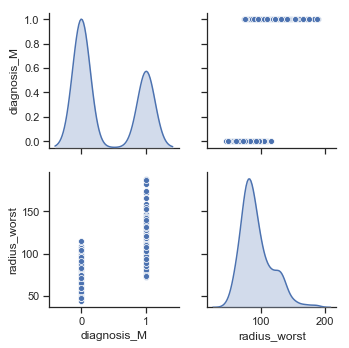

In [26]:
# Look at the relationship between these variables using pairplots
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_ohe, vars=['diagnosis_M', 'radius_worst'], diag_kind='kde')
plt.show()

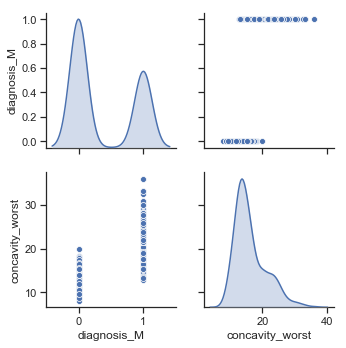

In [27]:
sns.pairplot(df_ohe, vars=['diagnosis_M', 'concavity_worst'], diag_kind='kde')
plt.show()

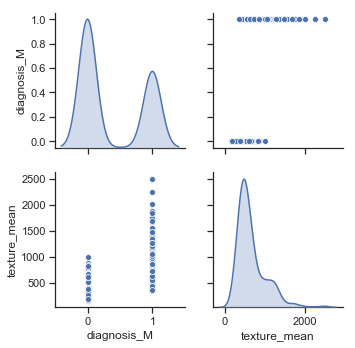

In [28]:
sns.pairplot(df_ohe, vars=['diagnosis_M', 'texture_mean'], diag_kind='kde')
plt.show()

Graphing the relationship between this categorical variable and the three features we note the categorical variable is Bi-modal having a maxima at 0 and 1. We note that for malignant tumors the mean values of:
* radius_worst
* concavity_worst and
* texture_mean

is higher

### Build a model to predict the malignant tumors
---
   * Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
   * Identify how you would control for overfitting in each classification technique.
   * Evaluate the performance of each model.
   * In each model, identify the most important predictive variables and explain how you identified them.

In [40]:
# Convert categorical variables to binary (0,1) using One-Hot Encoding
df_ohe = pd.get_dummies(df,prefix=['diagnosis'], drop_first=True)
# Create target and explanatory fields
X = df_ohe.drop('diagnosis_M', axis=1)
y = df_ohe['diagnosis_M']
# Standardize feature variables on a Z-score scale
scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_norm.head()

radius_mean  radius_sd_error  radius_worst  texture_mean  texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  perimeter_worst  area_mean  area_sd_error  area_worst  smoothness_mean  smoothness_sd_error  smoothness_worst  compactness_mean  compactness_sd_error  compactness_worst  concavity_mean  concavity_sd_error  concavity_worst  concave_points_mean  concave_points_sd_error  concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  fractal_dimension_sd_error  fractal_dimension_worst
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
842302    1.097064    -2.073335         1.269934      0.984375      1.568466          3.283515       2.652874        2.532475            2.217515         2.255747   2.489734      -0.565265    2.833031         2.487578            -0.214002          1.316862          0.724026              0.660820           1.148757        0.907083            1.886690        -1.359293             2.303601                 2.001237              1.307686       2.616665           2.109526        2.296076                2.750622                    1.937015               
842517    1.829821    -0.353632         1.685955      1.908708     -0.826962         -0.487072      -0.023846        0.548144            0.001392        -0.868652   0.499255      -0.876244    0.263327         0.742402            -0.605351         -0.692926         -0.440780              0.260162          -0.805450       -0.099444            1.805927        -0.369203             1.535126                 1.890489             -0.375612      -0.430444          -0.146749        1.087084               -0.243890                    0.281190               
84300903  1.579888     0.456187         1.566503      1.558884      0.942210          1.052926       1.363478        2.037231            0.939685        -0.398008   1.228676      -0.780083    0.850928         1.181336            -0.297005          0.814974          0.213076              1.424827           0.237036        0.293559            1.511870        -0.023974             1.347475                 1.456285              0.527407       1.082932           0.854974        1.955000                1.152255                    0.201391               
84348301 -0.768909     0.253732        -0.592687     -0.764464      3.283553          3.402909       1.915897        1.451707            2.867383         4.910919   0.326373      -0.110409    0.286593        -0.288378             0.689702          2.744280          0.819518              1.115007           4.732680        2.047511           -0.281464         0.133984            -0.249939                -0.550021              3.394275       3.893397           1.989588        2.175786                6.046041                    4.935010               
84358402  1.750297    -1.151816         1.776573      1.826229      0.280372          0.539340       1.371011        1.428493           -0.009560        -0.562450   1.270543      -0.790244    1.273189         1.190357             1.483067         -0.048520          0.828471              1.144205          -0.361092        0.499328            1.298575        -1.466770             1.338539                 1.220724              0.220556      -0.313395           0.613179        0.729259               -0.868353                   -0.397100

In [43]:
# Split 20% of data into a test set to score the classification model later on
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [55]:
print("The training set has", X_train.shape[0],"observations and",X_train.shape[1],"features")
print("The test set has", X_test.shape[0],"observations")

The training set has 455 observations and 30 features
The test set has 114 observations


In [56]:
114/(115+455)

0.2

### Random Forest Classifier
---
* Ensemble of decision trees - makes use of the wisdom of the crowds

In [60]:
# Hypertuning Parameters with 5 fold CV to prevent overfitting
forest_grid = GridSearchCV(RandomForestClassifier(), 
                      param_grid = {'max_depth': [1,2,3,4,5,6], 
                        'criterion': ['gini', 'entropy'],
                      'min_samples_leaf': [1,2,3],
                      'min_samples_split': [2,3,4,5,6]}, cv=5, scoring='roc_auc')
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [61]:
forest_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [71]:
print("Best AUC_ROC score on the training set is:",forest_grid.best_score_)

Best AUC_ROC score on the training set is: 0.9905318819111922


In [72]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
forest = RandomForestClassifier(criterion='gini',max_depth=3, min_samples_leaf=3, min_samples_split=4)
rf_results = cross_val_score(forest, X_test, y_test, cv=kfold, scoring='roc_auc')
print("Average AUC_ROC score on the test set is:", rf_results.mean())

Average AUC_ROC score on the test set is: 0.9969696969696968
